## 数据清洗

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# 读取数据（阿里美股股价数据）
alibaba = pd.read_excel(r'/Users/yves/Documents/Github/Jupyter/DataSet//BABA历史数据.xlsx')

In [3]:
alibaba.head()

,Date,Close,Open,High,Low,Volume,Rate
0,2020-12-23,256.18,255.23,257.34,252.54,10.73M,0.0014
1,2020-12-22,255.83,257.73,258.34,255.43,11.49M,-0.0177
2,2020-12-21,260.43,254.84,260.44,254.54,10.90M,0.0017
3,2020-12-18,260.00,263.90,264.90,259.20,15.98M,-0.0168
4,2020-12-17,264.43,264.82,264.82,260.38,14.31M,0.0097


In [4]:
alibaba.tail()

,Date,Close,Open,High,Low,Volume,Rate
1575,2014-09-26,90.46,89.73,90.46,88.66,18.34M,0.0173
1576,2014-09-25,88.92,91.09,91.50,88.50,28.60M,-0.0182
1577,2014-09-24,90.57,88.47,90.57,87.22,32.09M,0.0390
1578,2014-09-23,87.17,88.94,90.48,86.62,39.01M,-0.0303
1579,2014-09-22,89.89,92.70,92.95,89.50,66.66M,-0.0426


In [5]:
alibaba.info

<bound method DataFrame.info of            Date   Close    Open    High     Low  Volume    Rate
0    2020-12-23  256.18  255.23  257.34  252.54  10.73M  0.0014
1    2020-12-22  255.83  257.73  258.34  255.43  11.49M -0.0177
2    2020-12-21  260.43  254.84  260.44  254.54  10.90M  0.0017
3    2020-12-18  260.00  263.90  264.90  259.20  15.98M -0.0168
4    2020-12-17  264.43  264.82  264.82  260.38  14.31M  0.0097
...         ...     ...     ...     ...     ...     ...     ...
1575 2014-09-26   90.46   89.73   90.46   88.66  18.34M  0.0173
1576 2014-09-25   88.92   91.09   91.50   88.50  28.60M -0.0182
1577 2014-09-24   90.57   88.47   90.57   87.22  32.09M  0.0390
1578 2014-09-23   87.17   88.94   90.48   86.62  39.01M -0.0303
1579 2014-09-22   89.89   92.70   92.95   89.50  66.66M -0.0426

[1580 rows x 7 columns]>

In [6]:
alibaba.dtypes

Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume            object
Rate             float64
dtype: object

In [7]:
alibaba.isnull().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Rate      0
dtype: int64

In [8]:
alibaba.sort_values(by='Date', ascending=True, inplace=True)
alibaba.reset_index(drop=True, inplace=True)

In [10]:
# 去除交易量中的‘-’字符并转换为int格式数据
def convert(item):
    item = item.replace('M', '')
    item = item.replace('-', '0')
    return float(item)*1000000
alibaba['Volume'] = alibaba['Volume'].apply(convert).astype('int')

## 历史趋势分析

### 股价走势

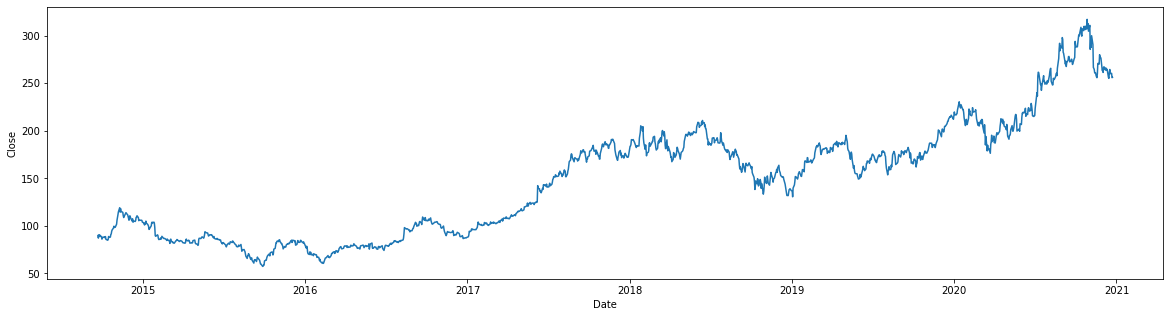

In [20]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Date', y='Close', data=alibaba)
plt.show()

### 交易量走势

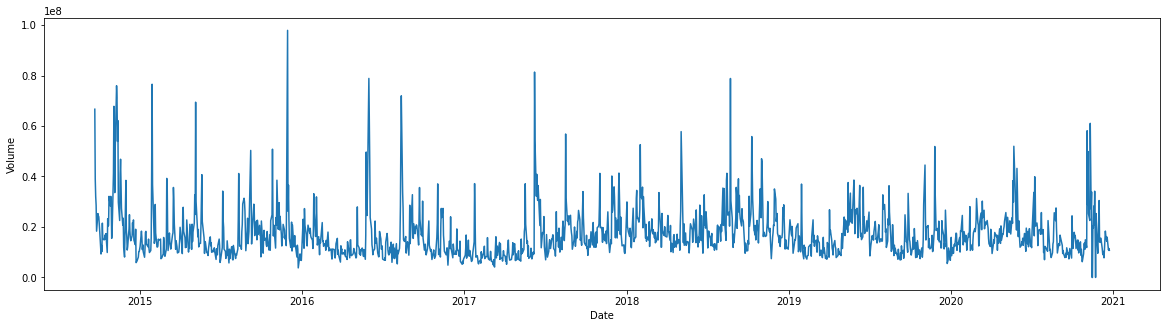

In [19]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Date', y='Volume', data=alibaba)
plt.show()

### 涨跌幅范围

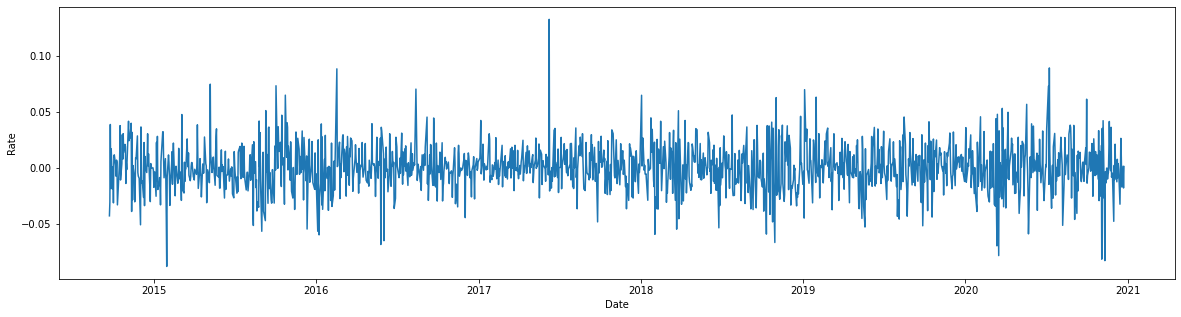

In [18]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='Date', y='Rate', data=alibaba)
plt.show()

### 涨跌幅集中度

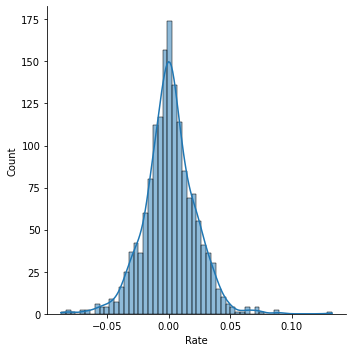

In [29]:
sns.displot(alibaba['Rate'], kde=True)
plt.show()